## SCENIC.loom导入R里面进行可视化

In [1]:
#加载R包：
rm(list=ls())
library(Seurat)
library(SCopeLoomR)
library(AUCell)
library(SCENIC)
library(dplyr)
library(KernSmooth)
library(RColorBrewer)
library(plotly)
library(BiocParallel)
library(grid)
library(ComplexHeatmap)
library(data.table)
# library(scRNAseq)
library(patchwork)
library(ggplot2) 
library(stringr)
library(circlize)
library(qs)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘SCopeLoomR’


The following object is masked from ‘package:base’:

    flush



Attaching package: ‘SCENIC’


The following object is masked from ‘package:AUCell’:

    plotEmb_rgb



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘pack

In [2]:
source("../custom_seurat_functions.R")

### Step1. 提取 out_SCENIC.loom 信息

In [3]:
#### 1.提取 out_SCENIC.loom 信息
loom <- open_loom('out_SCENIC.loom') 

regulons_incidMat <- get_regulons(loom, column.attr.name="Regulons")
regulons_incidMat[1:4,1:4] 

Xkr4 Gm1992 Gm37381 Rp1
Acaa1b(+) 0    0      0       0  
Alx4(+)   0    0      0       0  
Ascl1(+)  0    0      0       0  
Atf3(+)   0    0      0       0

In [4]:
regulons <- regulonsToGeneLists(regulons_incidMat)
regulonAUC <- get_regulons_AUC(loom,column.attr.name='RegulonsAUC')
regulonAucThresholds <- get_regulon_thresholds(loom)
tail(regulonAucThresholds[order(as.numeric(names(regulonAucThresholds)))])

0.224197928737809 0.242666697741603 0.250054487850633 0.266386755528802 
       "Cebpe(+)"        "Gata1(+)"        "Nfkb1(+)"         "Ets2(+)" 
0.310677313760437  0.33979741357865 
        "Mxd1(+)"         "Fosb(+)"

In [5]:
embeddings <- get_embeddings(loom)  
close_loom(loom)

rownames(regulonAUC)

[1] "Acaa1b(+)"  "Alx4(+)"    "Ascl1(+)"   "Atf3(+)"    "Atf4(+)"   
  [6] "Bach1(+)"   "Bcl6b(+)"   "Bclaf1(+)"  "Bhlha15(+)" "Bhlhe41(+)"
 [11] "Bptf(+)"    "Cebpa(+)"   "Cebpb(+)"   "Cebpe(+)"   "Chd1(+)"   
 [16] "Creb3(+)"   "Creb3l1(+)" "Creb3l2(+)" "Creb5(+)"   "Dbp(+)"    
 [21] "Dlx3(+)"    "E2f1(+)"    "E2f3(+)"    "E2f7(+)"    "E2f8(+)"   
 [26] "Elf1(+)"    "Elf2(+)"    "Elf3(+)"    "Elf5(+)"    "Elk3(+)"   
 [31] "Eomes(+)"   "Erg(+)"     "Ets1(+)"    "Ets2(+)"    "Etv3(+)"   
 [36] "Etv4(+)"    "Fli1(+)"    "Fos(+)"     "Fosb(+)"    "Fosl1(+)"  
 [41] "Fosl2(+)"   "Foxa1(+)"   "Foxa2(+)"   "Foxa3(+)"   "Foxc1(+)"  
 [46] "Foxc2(+)"   "Foxd2(+)"   "Foxg1(+)"   "Foxo4(+)"   "Foxp3(+)"  
 [51] "Foxp4(+)"   "Gata1(+)"   "Gata2(+)"   "Gata4(+)"   "Gata5(+)"  
 [56] "Gata6(+)"   "Gatad1(+)"  "Gli1(+)"    "Grhl1(+)"   "Hic1(+)"   
 [61] "Hif1a(+)"   "Hlf(+)"     "Hnf1b(+)"   "Hoxa1(+)"   "Hoxa3(+)"  
 [66] "Hoxb2(+)"   "Hoxc6(+)"   "Hoxd9(+)"   "Ikzf1(+)"   "Irf1(+)"   
 [71] "Irf3(+)"    "Irf5(+)"    "Irf6(+)"    "Irf7(+)"    "Irf8(+)"   
 [76] "Isl1(+)"    "Jun(+)"     "Junb(+)"    "Jund(+)"    "Klf4(+)"   
 [81] "Klf6(+)"    "Klf7(+)"    "Klf9(+)"    "Maf(+)"     "Mafa(+)"   
 [86] "Mafb(+)"    "Maff(+)"    "Mafg(+)"    "Mafk(+)"    "Max(+)"    
 [91] "Meis1(+)"   "Meox1(+)"   "Mitf(+)"    "Mllt10(+)"  "Msx1(+)"   
 [96] "Mxd1(+)"    "Mxd3(+)"    "Mxd4(+)"    "Myb(+)"     "Mzf1(+)"   
[101] "Nfatc1(+)"  "Nfatc4(+)"  "Nfe2(+)"    "Nfe2l1(+)"  "Nfe2l2(+)" 
[106] "Nfia(+)"    "Nfic(+)"    "Nfkb1(+)"   "Nkx2-1(+)"  "Nkx2-9(+)" 
[111] "Nkx6-2(+)"  "Nr1d1(+)"   "Nr1h3(+)"   "Nr1h4(+)"   "Nr2f1(+)"  
[116] "Nr3c1(+)"   "Nr5a2(+)"   "Otx1(+)"    "Pax9(+)"    "Pbx1(+)"   
[121] "Pdlim5(+)"  "Pgr(+)"     "Pou3f1(+)"  "Pparg(+)"   "Prdm1(+)"  
[126] "Prdm5(+)"   "Prrx2(+)"   "Pura(+)"    "Rarb(+)"    "Rarg(+)"   
[131] "Rb1(+)"     "Rel(+)"     "Relb(+)"    "Rfx2(+)"    "Rfx3(+)"   
[136] "Rfx5(+)"    "Rreb1(+)"   "Runx2(+)"   "Runx3(+)"   "Rxrb(+)"   
[141] "Rxrg(+)"    "Sfpq(+)"    "Smad1(+)"   "Smarcc2(+)" "Sox11(+)"  
[146] "Sox18(+)"   "Sox21(+)"   "Sox7(+)"    "Sox9(+)"    "Spi1(+)"   
[151] "Spib(+)"    "Spic(+)"    "Srf(+)"     "Stat1(+)"   "Stat2(+)"  
[156] "Taf6(+)"    "Tbx15(+)"   "Tbx18(+)"   "Tbx20(+)"   "Tbx21(+)"  
[161] "Tbx5(+)"    "Tcf12(+)"   "Tcf7l1(+)"  "Tcf7l2(+)"  "Tef(+)"    
[166] "Tfap2c(+)"  "Tfdp1(+)"   "Tfec(+)"    "Thra(+)"    "Thrb(+)"   
[171] "Tlx2(+)"    "Trp63(+)"   "Trp73(+)"   "Twist1(+)"  "Ube2k(+)"  
[176] "Usf2(+)"    "Xbp1(+)"    "Ybx1(+)"    "Yy1(+)"     "Zbtb20(+)" 
[181] "Zbtb33(+)"  "Zbtb7a(+)"  "Zeb1(+)"    "Zfp11(+)"   "Zfp213(+)" 
[186] "Zfp316(+)"  "Zfp317(+)"  "Zfp354a(+)" "Zfp407(+)"  "Zfp493(+)" 
[191] "Zfp541(+)"  "Zfp768(+)"  "Zfp770(+)"  "Zfp784(+)"  "Zfp943(+)"

### Step2. 加载Seurat Data

In [6]:
# Macrophages <- qread("/home/guoliming/Brown/ALI_CRL/ALI/Macrophages/Outdata/Sub_annotion.qs")
# seurat.data  <- subset(Macrophages, subset = celltype %in% c("Macrophages_c2","Macrophages_c9","Macrophages_c10"))
# seurat.data <- subset(Macrophages, subset = !grepl("\\(", celltype))

seurat.data <- qread("/home/guoliming/Brown/ALI_Gaoji/sc_bulk_analysis_Epithelial/7_RNAseq/all_cells.qs")


In [7]:
# qsave(seurat.data,file="Macro_Sub_annotion.qs")

In [8]:
### 2.加载SeuratData
# seurat.data = qread(file = "./Outdata/Step1.pySCENIC_test_seurat.qs")
#seurat.data = readRDS("./pbmc3k.test.seurat.Rds")
# seurat.data <- seurat.data %>% NormalizeData(verbose = F) %>%
#   FindVariableFeatures(selection.method = "vst", nfeatures = 2000, verbose = F) %>% 
#   ScaleData(verbose = F) %>%
#   RunPCA(npcs = 30, verbose = F)

# n.pcs = 30
# seurat.data <- seurat.data %>% 
#   RunUMAP(reduction = "pca", dims = 1:n.pcs, verbose = F) %>% 
#   FindNeighbors(reduction = "pca", k.param = 10, dims = 1:n.pcs)

In [9]:
# 这里有自带的注释
# seurat.data$seurat_annotations[is.na(seurat.data$seurat_annotations)] = "B"
# Idents(seurat.data) <- "seurat_annotations"

# options(repr.plot.width = 6, repr.plot.height = 4.5)
# DimPlot(seurat.data, reduction = "umap", label=T) 

In [10]:
## 把SCENIC的结果与seurat数据合并
sub_regulonAUC <- regulonAUC[,match(colnames(seurat.data),colnames(regulonAUC))]
#确认是否一致
identical(colnames(sub_regulonAUC), colnames(seurat.data))
dim(sub_regulonAUC)

[1] TRUE

[1]   195 28531

In [11]:
cellTypes <- data.frame(row.names = colnames(seurat.data), 
                        celltype = seurat.data$celltype)
head(cellTypes)

celltype
GSM8504081_AAACCCAAGGCATCAG-1 T cells 
GSM8504081_AAACCCAGTCGAATTC-1 B cells 
GSM8504081_AAACCCATCCGTGGCA-1 B cells 
GSM8504081_AAACCCATCCTAACAG-1 T cells 
GSM8504081_AAACGCTCAGCTGGTC-1 B cells 
GSM8504081_AAACGCTTCGCCTCTA-1 B cells

In [12]:
sub_regulonAUC[1:4,1:4] 

AUC for 4 regulons (rows) and 4 cells (columns).

Top-left corner of the AUC matrix:
           cells
regulons    GSM8504081_AAACCCAAGGCATCAG-1 GSM8504081_AAACCCAGTCGAATTC-1
  Acaa1b(+)                    0.00000000                    0.09761072
  Alx4(+)                      0.00000000                    0.00000000
  Ascl1(+)                     0.00000000                    0.00000000
  Atf3(+)                      0.08142789                    0.06845402
           cells
regulons    GSM8504081_AAACCCATCCGTGGCA-1 GSM8504081_AAACCCATCCTAACAG-1
  Acaa1b(+)                    0.06559586                    0.07142337
  Alx4(+)                      0.00000000                    0.00000000
  Ascl1(+)                     0.00000000                    0.00000000
  Atf3(+)                      0.08345985                    0.04468777

In [13]:
library(SummarizedExperiment)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins

In [14]:
scenic_res = assay(sub_regulonAUC) %>% as.matrix()
seurat.data[["scenic"]] <- SeuratObject::CreateAssayObject(counts = scenic_res)
seurat.data <- SeuratObject::SetAssayData(seurat.data, slot = "scale.data",
                                  new.data = scenic_res, assay = "scenic")

Warning message:
“The `slot` argument of `SetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


In [15]:
seurat.data

An object of class Seurat 
34524 features across 28531 samples within 2 assays 
Active assay: RNA (34329 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: scenic

### Step3. 常规可视化

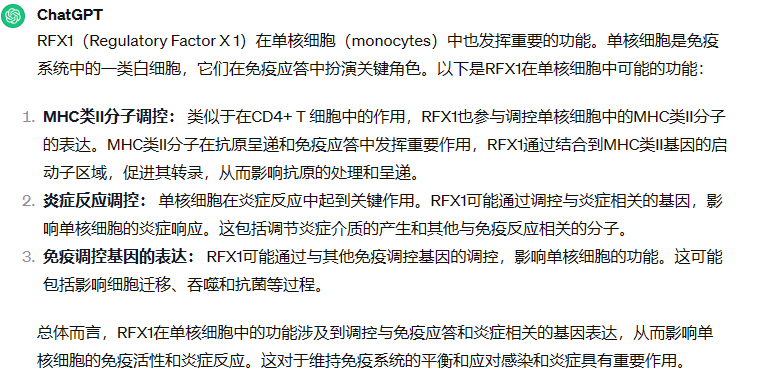


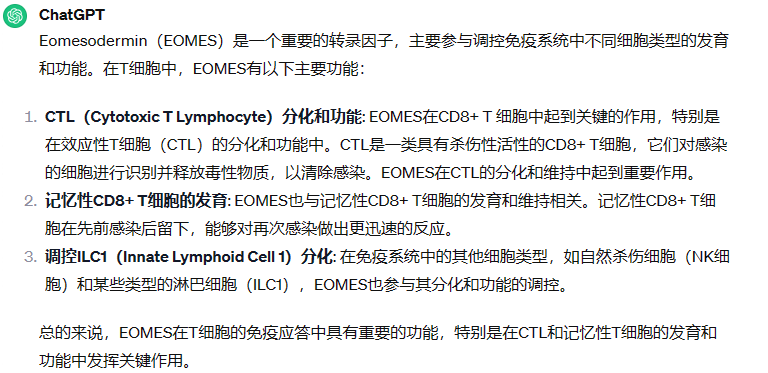

## 保存Tf-target的对应关系

In [16]:
tf_targets <- tibble(
  TF = rep(names(regulons), sapply(regulons, length)),  # TF 名称重复
  TargetGene = unlist(regulons)                        # 对应靶基因
)

# 导出为 CSV
write.csv(tf_targets, "SCENIC_TF_Targets.csv", row.names = FALSE)

## 得到细胞亚群特异性TF

In [17]:
### 4.1. TF活性均值
# 看看不同单细胞亚群的转录因子活性平均值
# Split the cells by cluster:
selectedResolution <- "celltype" # select resolution
cellsPerGroup <- split(rownames(cellTypes), 
                       cellTypes[,selectedResolution])

# 去除extened regulons
sub_regulonAUC <- sub_regulonAUC[onlyNonDuplicatedExtended(rownames(sub_regulonAUC)),] 
dim(sub_regulonAUC)

# Calculate average expression:
regulonActivity_byGroup <- sapply(cellsPerGroup,
                                  function(cells) 
                                    rowMeans(getAUC(sub_regulonAUC)[,cells]))

# Scale expression. 
# Scale函数是对列进行归一化，所以要把regulonActivity_byGroup转置成细胞为行，基因为列
# 参考：https://www.jianshu.com/p/115d07af3029
regulonActivity_byGroup_Scaled <- t(scale(t(regulonActivity_byGroup),
                                          center = T, scale=T)) 
# 同一个regulon在不同cluster的scale处理
dim(regulonActivity_byGroup_Scaled)
regulonActivity_byGroup_Scaled=na.omit(regulonActivity_byGroup_Scaled)

[1]   195 28531

[1] 195  38

## 可视化fc>3的

In [155]:
# ### 4.3 其他查看TF方式
# rss=regulonActivity_byGroup_Scaled
# head(rss)
# df = do.call(rbind,
#              lapply(1:ncol(rss), function(i){
#                dat = data.frame(
#                  path = rownames(rss),
#                  cluster = colnames(rss)[i],
#                  sd.1 = rss[,i],
#                  sd.2 = apply(rss[,-i], 1, median)  
#                )
#              }))
# df$fc = df$sd.1 - df$sd.2

# ## 可视化fc>3的

# Macrophages_c2_tf <- df %>%
#   filter(cluster %in% c("Macrophages_c2","Macrophages_c10","Macrophages_c9")) %>% 
#   filter(fc > 3) %>% 
#   # top_n(5, fc) %>% 
# arrange(desc(fc))

# # top5 <- Macrophages_c2_tf %>% group_by(cluster) %>% top_n(5, fc)
# rowcn = data.frame(path = Macrophages_c2_tf$cluster) 
# n = rss[Macrophages_c2_tf$path,] 
# #rownames(rowcn) = rownames(n)

# options(repr.plot.width = 12, repr.plot.height = 8)

# pdf("pheatmap_fc3.pdf", width=12, height=8)
# pheatmap(n,
#          annotation_row = rowcn,
#          show_rownames = T,
#          fontsize = 15)
# dev.off()

## 可视化top3的

In [136]:
### 4.3 其他查看TF方式
rss=regulonActivity_byGroup_Scaled
# head(rss)
df = do.call(rbind,
             lapply(1:ncol(rss), function(i){
               dat = data.frame(
                 path = rownames(rss),
                 cluster = colnames(rss)[i],
                 sd.1 = rss[,i],
                 sd.2 = apply(rss[,-i], 1, median)  
               )
             }))
df$fc = df$sd.1 - df$sd.2

## 可视化top5的

Macrophages_c2_tf <- df %>%
  filter(cluster %in% c("Macrophages_c2","Macrophages_c10","Macrophages_c9")) %>% 
  # filter(fc > 3) %>% 
  # top_n(5, fc) %>% 
arrange(desc(fc))

Macrophages_c2_tf <- Macrophages_c2_tf %>% group_by(cluster) %>% top_n(3, fc)
rowcn = data.frame(path = Macrophages_c2_tf$cluster) 
n = rss[Macrophages_c2_tf$path,] 
#rownames(rowcn) = rownames(n)

# top5
options(repr.plot.width = 12, repr.plot.height = 6)

pdf("pheatmap_top3_.pdf", width=12, height=6)
pheatmap(n,
         annotation_row = rowcn,
         show_rownames = T,
         fontsize = 15)
dev.off()
         

agg_record_1566156883 
                    2

In [137]:
unique(Macrophages_c2_tf$cluster)

[1] "Macrophages_c9"  "Macrophages_c10" "Macrophages_c2"

In [138]:
write.csv(Macrophages_c2_tf,
          file = "Macrophages_tf_Top3.csv",
          row.names = FALSE)   # 不要行名

## 可选-bulk-sigmarker & scenic调控基因求交集（这部分在7_RNAseq可做）

In [149]:
# 加载包
library(dplyr)

# SCENIC_TF_Targets为TF-Target对应表格
scenic_df <- read.csv("/home/guoliming/Brown/ALI_Gaoji/sc_bulk_analysis_Epithelial/8_scenic/SCENIC_TF_Targets.csv")

### common_genes_Log2FC_Padj为bulk-RNA差异表达基因和逆时序分析的交集
rna_df <- read.csv("/home/guoliming/Brown/ALI_Gaoji/sc_bulk_analysis_Epithelial/7_RNAseq/c2_common_gene_Log2FC_2.csv")

# 确保列名一致
colnames(scenic_df)[1:2]  # 应该是 "TF" 和 "TargetGene"
colnames(rna_df)[1]       # 应该是 "Gene_name"

[1] "TF"         "TargetGene"

[1] "Gene_name"

In [150]:
Macrophages_c2_tf

path       cluster         sd.1     sd.2       fc      
1 Acaa1b(+)  Macrophages_c9  5.006384 -0.3403466 5.346731
2 Tcf7l2(+)  Macrophages_c9  4.829968 -0.1952710 5.025239
3 Bhlhe41(+) Macrophages_c9  4.554638 -0.3396109 4.894249
4 Zfp354a(+) Macrophages_c10 4.351343 -0.2796334 4.630976
5 Stat1(+)   Macrophages_c2  3.725799 -0.1779132 3.903713
6 Stat2(+)   Macrophages_c2  3.470169 -0.2518493 3.722018
7 Rreb1(+)   Macrophages_c2  2.912927 -0.2927041 3.205631
8 Mafb(+)    Macrophages_c10 2.303232 -0.5790940 2.882326
9 Bhlha15(+) Macrophages_c10 2.322008 -0.1866997 2.508708

In [151]:
Macrophages_c2_tf_gene <- Macrophages_c2_tf %>%
  filter(cluster == "Macrophages_c2")

scenic_filtered <- scenic_df %>%
  filter(TF %in% Macrophages_c2_tf_gene$path)

In [152]:
scenic_filtered
write.csv(scenic_filtered,
          file = "c2_scenic_gene_target.csv",
          row.names = FALSE)   # 不要行名

TF       TargetGene   
1   Rreb1(+) Abca1        
2   Rreb1(+) Ankrd52      
3   Rreb1(+) Mtmr3        
4   Rreb1(+) Pstpip2      
5   Rreb1(+) Ubtd1        
6   Rreb1(+) Mir9-3hg     
7   Stat1(+) Tcea1        
8   Stat1(+) Rgs20        
9   Stat1(+) Vcpip1       
10  Stat1(+) Sbspon       
11  Stat1(+) Tmem131      
12  Stat1(+) Coa5         
13  Stat1(+) Mitd1        
14  Stat1(+) Il1r2        
15  Stat1(+) Stat1        
16  Stat1(+) Pgap1        
17  Stat1(+) Cflar        
18  Stat1(+) Casp8        
19  Stat1(+) Nrp2         
20  Stat1(+) Ino80dos     
21  Stat1(+) Adam23       
22  Stat1(+) Plekhm3      
23  Stat1(+) Rpe          
24  Stat1(+) Apol7d       
25  Stat1(+) Mreg         
26  Stat1(+) 1700016L21Rik
27  Stat1(+) C130026I21Rik
28  Stat1(+) Sp110        
29  Stat1(+) Sp140        
30  Stat1(+) Sp100        
⋮   ⋮        ⋮            
954 Stat2(+) Ccl8         
955 Stat2(+) Slfn5        
956 Stat2(+) Slfn8        
957 Stat2(+) Dhx58        
958 Stat2(+) Fbxw17       
959 Stat2(+) Zfp729a      
960 Stat2(+) Cd180        
961 Stat2(+) Rsad2        
962 Stat2(+) Cmpk2        
963 Stat2(+) Serpina3f    
964 Stat2(+) Socs1        
965 Stat2(+) Rtp4         
966 Stat2(+) Parp14       
967 Stat2(+) Dtx3l        
968 Stat2(+) Parp9        
969 Stat2(+) Tap1         
970 Stat2(+) Atp6v1g2     
971 Stat2(+) H2-T24       
972 Stat2(+) Eif2ak2      
973 Stat2(+) Batf2        
974 Stat2(+) Chrm1        
975 Stat2(+) Ifit2        
976 Stat2(+) Ifit3        
977 Stat2(+) Ifit3b       
978 Stat2(+) Ifit1        
979 Stat2(+) Nectin4      
980 Stat2(+) Ifi213       
981 Stat2(+) 9130221F21Rik
982 Stat2(+) A330040F15Rik
983 Stat2(+) 4933407K13Rik

In [153]:
# 取交集
inter_genes <- intersect(unique(scenic_filtered$TargetGene),
                         rna_df$Gene_name)

# 转换为 data.frame
inter_genes_df <- data.frame(Gene = inter_genes)

# 写出到 CSV
write.csv(inter_genes_df, "c2___intersect_genes.csv", row.names = FALSE)


In [154]:
inter_genes

[1] "Cxcl9"  "Clec4e" "Hmox1"  "Nos2"   "Sod2"   "Acod1"

## 可视化

[1] TRUE TRUE TRUE

Picking joint bandwidth of 0.005

Picking joint bandwidth of 0.0141

Picking joint bandwidth of 0.00245



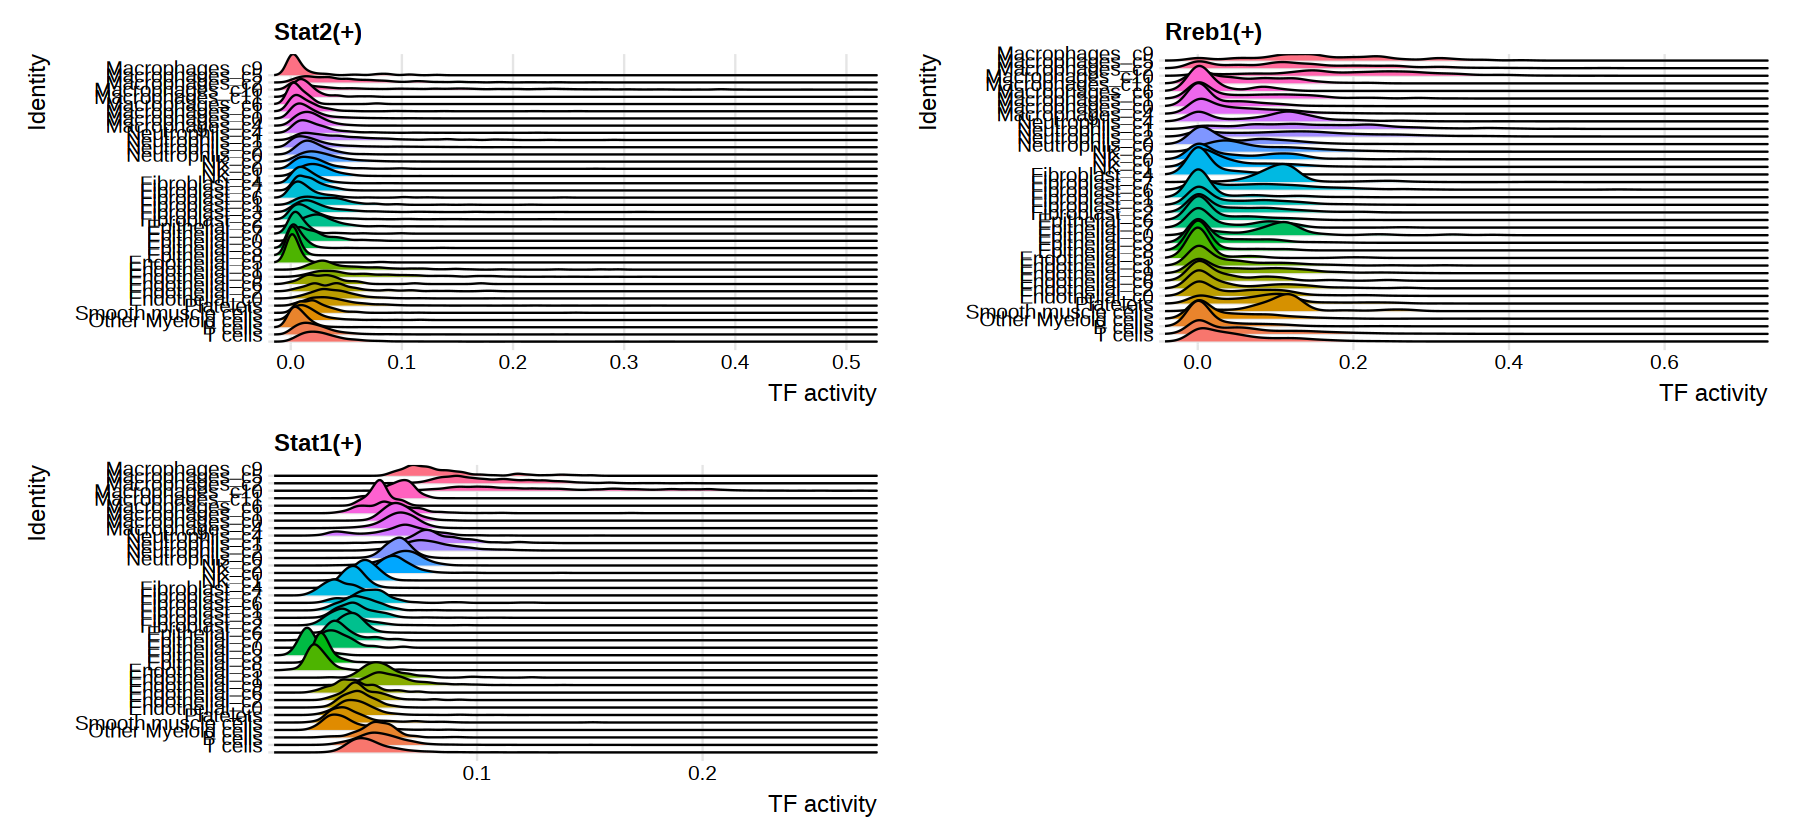

In [ ]:
## 绘制单个基因在不同亚型的表达量
regulonsToPlot = c("Stat2(+)","Rreb1(+)","Stat1(+)")
regulonsToPlot %in% row.names(sub_regulonAUC)
# Vis
p1 = DotPlot(seurat.data, features = unique(regulonsToPlot), assay = "scenic") + coord_flip() + RotatedAxis()
p2 = VlnPlot(seurat.data, features = regulonsToPlot, assay = "scenic",pt.size = 0)&labs(y="TF activity")
p3 = RidgePlot(seurat.data, features = regulonsToPlot, assay = "scenic" , ncol = 2)&labs(x="TF activity")
# p4 = FeaturePlot(seurat.data,features = regulonsToPlot)

options(repr.plot.width = 15, repr.plot.height = 7)
wrap_plots(p1
# ,p2,p3
# ,p4
)

In [ ]:
sssssssssss--end

### Step4. 亚群特异性转录因子分析及可视化

In [ ]:
### 4.1. TF活性均值
# 看看不同单细胞亚群的转录因子活性平均值
# Split the cells by cluster:
selectedResolution <- "celltype" # select resolution
cellsPerGroup <- split(rownames(cellTypes), 
                       cellTypes[,selectedResolution])

# 去除extened regulons
sub_regulonAUC <- sub_regulonAUC[onlyNonDuplicatedExtended(rownames(sub_regulonAUC)),] 
dim(sub_regulonAUC)

# Calculate average expression:
regulonActivity_byGroup <- sapply(cellsPerGroup,
                                  function(cells) 
                                    rowMeans(getAUC(sub_regulonAUC)[,cells]))

# Scale expression. 
# Scale函数是对列进行归一化，所以要把regulonActivity_byGroup转置成细胞为行，基因为列
# 参考：https://www.jianshu.com/p/115d07af3029
regulonActivity_byGroup_Scaled <- t(scale(t(regulonActivity_byGroup),
                                          center = T, scale=T)) 
# 同一个regulon在不同cluster的scale处理
dim(regulonActivity_byGroup_Scaled)
regulonActivity_byGroup_Scaled=na.omit(regulonActivity_byGroup_Scaled)

[1] 229 832

[1] 229   3

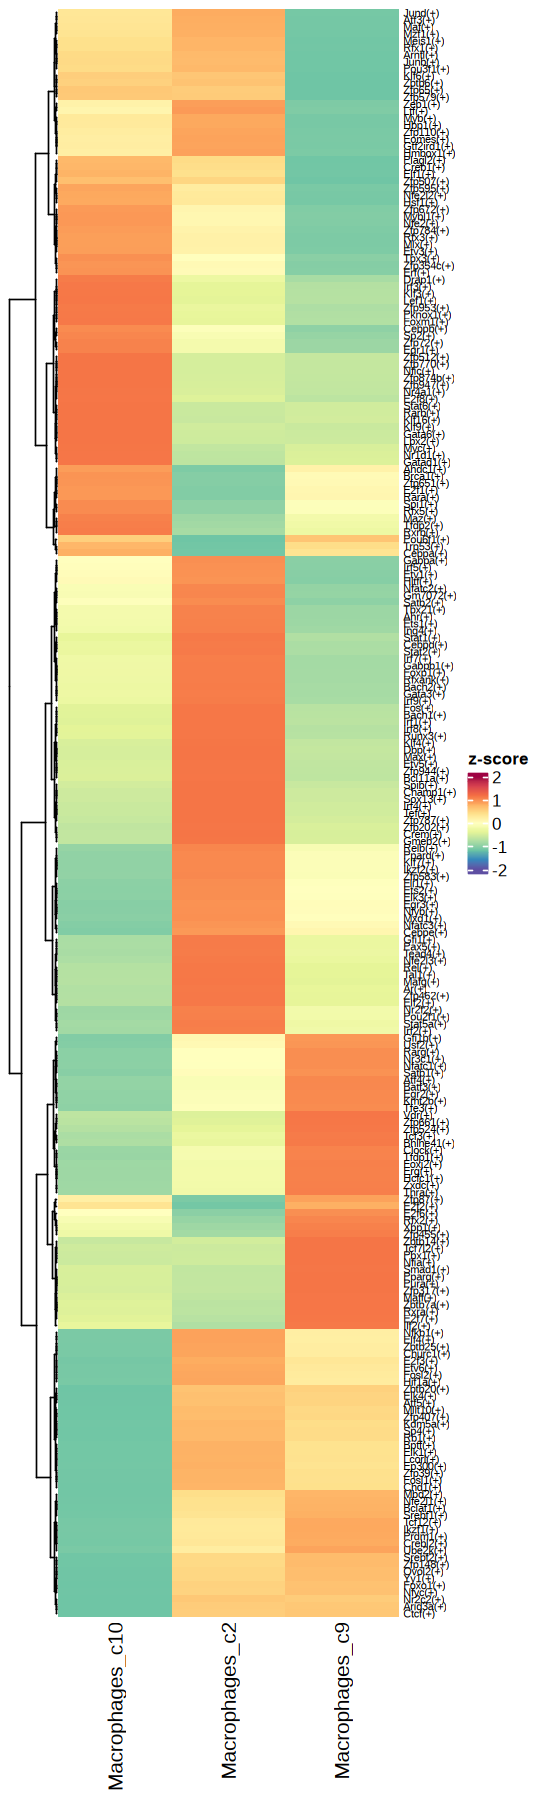

In [ ]:
#热图查看TF分布：
options(repr.plot.width = 4.5, repr.plot.height = 15)
Heatmap(
  regulonActivity_byGroup_Scaled,
  name                         = "z-score",
  col                          = colorRamp2(seq(from=-2,to=2,length=11),rev(brewer.pal(11, "Spectral"))),
  show_row_names               = TRUE,
  show_column_names            = TRUE,
  row_names_gp                 = gpar(fontsize = 6),
  clustering_method_rows = "ward.D2",
  clustering_method_columns = "ward.D2",
  row_title_rot                = 0,
  cluster_rows                 = TRUE,
  cluster_row_slices           = FALSE,
  cluster_columns              = FALSE)

可以看到，确实每个单细胞亚群都是有自己的特异性的激活的转录因子。

不过，SCENIC包自己提供了一个 calcRSS函数，帮助我们来挑选各个单细胞亚群特异性的转录因子，全称是：Calculates the regulon specificity score
参考文章：The RSS was first used by Suo et al. in: Revealing the Critical Regulators of Cell Identity in the Mouse Cell Atlas. Cell Reports (2018). doi: 10.1016/j.celrep.2018.10.045 运行超级简单。

In [ ]:
### 4.2. rss查看特异TF
rss <- calcRSS(AUC=getAUC(sub_regulonAUC), 
               cellAnnotation=cellTypes[colnames(sub_regulonAUC), selectedResolution]) 
rss=na.omit(rss) 
rssPlot <- plotRSS(rss)

Showing regulons and cell types with any RSS > 0.01 (dim: 66x3)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the SCENIC package.
  Please report the issue to the authors.”


In [ ]:
plotly::ggplotly(rssPlot$plot&coord_flip())

HTML widgets cannot be represented in plain text (need html)

In [ ]:
### 4.3 其他查看TF方式
rss=regulonActivity_byGroup_Scaled
head(rss)
df = do.call(rbind,
             lapply(1:ncol(rss), function(i){
               dat = data.frame(
                 path = rownames(rss),
                 cluster = colnames(rss)[i],
                 sd.1 = rss[,i],
                 sd.2 = apply(rss[,-i], 1, median)  
               )
             }))
df$fc = df$sd.1 - df$sd.2
top5 <- df %>% group_by(cluster) %>% top_n(50, fc)
rowcn = data.frame(path = top5$cluster) 
n = rss[top5$path,] 
#rownames(rowcn) = rownames(n)

Macrophages_c10 Macrophages_c2 Macrophages_c9
Ahdc1(+)   0.9066592      -1.0725847      0.1659255    
Ahr(+)    -0.1823199       1.0786161     -0.8962962    
Ar(+)     -0.7581698       1.1333288     -0.3751590    
Arid3a(+) -1.1544794       0.5576710      0.5968084    
Arntl(+)   0.4421630       0.7026982     -1.1448612    
Atf3(+)    0.3182345       0.8021554     -1.1203899

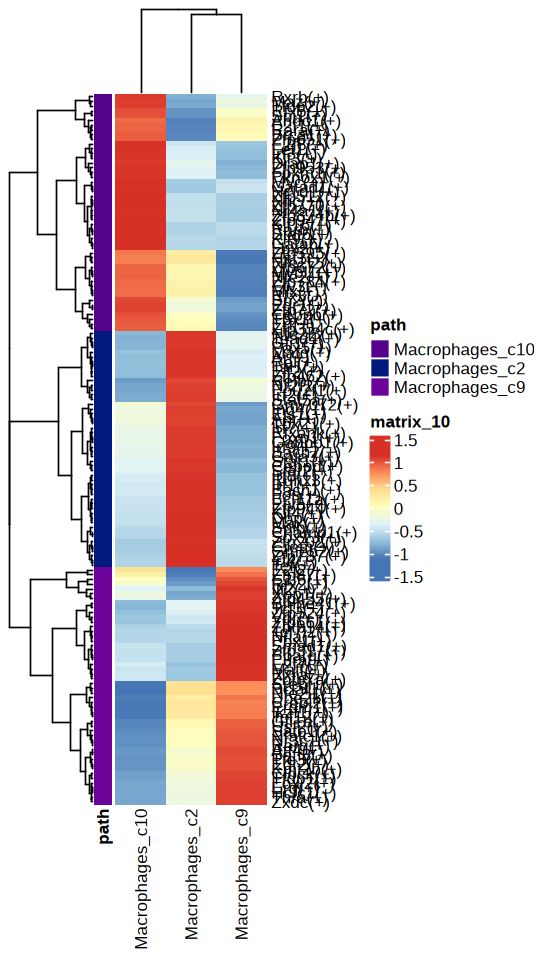

In [ ]:
options(repr.plot.width = 4.5, repr.plot.height = 8)
pheatmap(n,
         annotation_row = rowcn,
         show_rownames = T)

In [ ]:
macrophage_tf <- top5 %>%
  filter(cluster == "Macrophages_c2") %>%
  arrange(desc(fc))

# 查看结果
macrophage_tf

# 只输出 regulon 名称（TF）
macrophage_tf_list <- unique(macrophage_tf$path)
macrophage_tf_list

path      cluster        sd.1     sd.2       fc      
1  Champ1(+) Macrophages_c2 1.154701 -0.5773503 1.732051
2  Sox13(+)  Macrophages_c2 1.154701 -0.5773503 1.732051
3  Tef(+)    Macrophages_c2 1.154332 -0.5771658 1.731498
4  Irf4(+)   Macrophages_c2 1.154300 -0.5771502 1.731451
5  Spib(+)   Macrophages_c2 1.154042 -0.5770212 1.731064
6  Zfp787(+) Macrophages_c2 1.153403 -0.5767015 1.730104
7  Dbp(+)    Macrophages_c2 1.152547 -0.5762735 1.728821
8  Max(+)    Macrophages_c2 1.152163 -0.5760817 1.728245
9  Crem(+)   Macrophages_c2 1.151726 -0.5758632 1.727590
10 Klf4(+)   Macrophages_c2 1.151523 -0.5757617 1.727285
11 Gmeb2(+)  Macrophages_c2 1.151491 -0.5757455 1.727237
12 Zfp202(+) Macrophages_c2 1.150409 -0.5752044 1.725613
13 Etv5(+)   Macrophages_c2 1.150404 -0.5752019 1.725606
14 Zfp944(+) Macrophages_c2 1.149816 -0.5749078 1.724723
15 Bcl11a(+) Macrophages_c2 1.149002 -0.5745011 1.723503
16 Irf1(+)   Macrophages_c2 1.145413 -0.5727066 1.718120
17 Bach1(+)  Macrophages_c2 1.144004 -0.5720019 1.716006
18 Fos(+)    Macrophages_c2 1.142979 -0.5714894 1.714468
19 Runx3(+)  Macrophages_c2 1.141230 -0.5706151 1.711845
20 Mafg(+)   Macrophages_c2 1.140370 -0.5701852 1.710556
21 Irf8(+)   Macrophages_c2 1.140071 -0.5700355 1.710107
22 Tal1(+)   Macrophages_c2 1.137968 -0.5689842 1.706953
23 Rel(+)    Macrophages_c2 1.137606 -0.5688032 1.706410
24 Elf2(+)   Macrophages_c2 1.136528 -0.5682638 1.704791
25 Zfp462(+) Macrophages_c2 1.135140 -0.5675700 1.702710
26 Ar(+)     Macrophages_c2 1.133329 -0.5666644 1.699993
27 Stat1(+)  Macrophages_c2 1.133271 -0.5666353 1.699906
28 Nfe2l3(+) Macrophages_c2 1.125413 -0.5627065 1.688119
29 Stat2(+)  Macrophages_c2 1.122939 -0.5614695 1.684408
30 Cebpd(+)  Macrophages_c2 1.121160 -0.5605799 1.681740
31 Pax5(+)   Macrophages_c2 1.120908 -0.5604541 1.681362
32 Gfi1(+)   Macrophages_c2 1.119952 -0.5599761 1.679928
33 Tead4(+)  Macrophages_c2 1.116312 -0.5581559 1.674468
34 Irf9(+)   Macrophages_c2 1.115443 -0.5577213 1.673164
35 Bach2(+)  Macrophages_c2 1.111673 -0.5558364 1.667509
36 Gata3(+)  Macrophages_c2 1.109272 -0.5546361 1.663908
37 Rfxank(+) Macrophages_c2 1.106321 -0.5531605 1.659481
38 Foxp1(+)  Macrophages_c2 1.105553 -0.5527767 1.658330
39 Stat5a(+) Macrophages_c2 1.105086 -0.5525429 1.657629
40 Gabpb1(+) Macrophages_c2 1.104798 -0.5523988 1.657197
41 Irf7(+)   Macrophages_c2 1.103919 -0.5519597 1.655879
42 Irf2(+)   Macrophages_c2 1.097170 -0.5485849 1.645755
43 Ing4(+)   Macrophages_c2 1.091863 -0.5459316 1.637795
44 Pou2f1(+) Macrophages_c2 1.090129 -0.5450646 1.635194
45 Nr2f2(+)  Macrophages_c2 1.086140 -0.5430700 1.629210
46 Ets1(+)   Macrophages_c2 1.082983 -0.5414913 1.624474
47 Ahr(+)    Macrophages_c2 1.078616 -0.5393080 1.617924
48 Tbx21(+)  Macrophages_c2 1.078322 -0.5391608 1.617482
49 Relb(+)   Macrophages_c2 1.056319 -0.5281594 1.584478
50 Gm7072(+) Macrophages_c2 1.051620 -0.5258102 1.577431

[1] "Champ1(+)" "Sox13(+)"  "Tef(+)"    "Irf4(+)"   "Spib(+)"   "Zfp787(+)"
 [7] "Dbp(+)"    "Max(+)"    "Crem(+)"   "Klf4(+)"   "Gmeb2(+)"  "Zfp202(+)"
[13] "Etv5(+)"   "Zfp944(+)" "Bcl11a(+)" "Irf1(+)"   "Bach1(+)"  "Fos(+)"   
[19] "Runx3(+)"  "Mafg(+)"   "Irf8(+)"   "Tal1(+)"   "Rel(+)"    "Elf2(+)"  
[25] "Zfp462(+)" "Ar(+)"     "Stat1(+)"  "Nfe2l3(+)" "Stat2(+)"  "Cebpd(+)" 
[31] "Pax5(+)"   "Gfi1(+)"   "Tead4(+)"  "Irf9(+)"   "Bach2(+)"  "Gata3(+)" 
[37] "Rfxank(+)" "Foxp1(+)"  "Stat5a(+)" "Gabpb1(+)" "Irf7(+)"   "Irf2(+)"  
[43] "Ing4(+)"   "Pou2f1(+)" "Nr2f2(+)"  "Ets1(+)"   "Ahr(+)"    "Tbx21(+)" 
[49] "Relb(+)"   "Gm7072(+)"

In [ ]:
macrophage_tf_filter <- top5 %>%
  filter(fc>1)

In [ ]:
nrow(macrophage_tf_filter)

[1] 150

In [ ]:
# 求交集 TF
intersect_tf <- intersect(macrophage_tf_list, result$TF)

# 提取 result 中对应的 TF-TargetGene 关系
final_df <- result[result$TF %in% intersect_tf, ]

# 查看结果
head(final_df)

# 保存结果
write.csv(final_df,
          "Macrophages_c2_specific_intersect_TF_Targets.csv",
          row.names = FALSE)


TF       TargetGene
3  Bach1(+) Pstpip2   
15 Dbp(+)   Acod1     
18 Fos(+)   Tnfaip3   
25 Irf1(+)  Ptgs2     
26 Irf1(+)  Il1rn     
27 Irf1(+)  Cxcl9

### Step5. Rank图

In [ ]:
library(parallel)
library(philentropy)
library(ggrepel)
library(latex2exp)

ERROR: Error in library(philentropy): there is no package called ‘philentropy’


In [ ]:
### 5.1 读入RAS矩阵
rasMat <- seurat.data@assays$scenic@counts %>% t() %>% as.data.frame()

### 5.2 读入细胞类型矩阵
cell.info <- seurat.data@meta.data
cell.info$celltype <- seurat.data@meta.data$seurat_annotations

cell.types <- names(table(cell.info$celltype))
ctMat <- lapply(cell.types, function(i) {
  as.numeric(cell.info$celltype == i)
})
ctMat <- do.call(cbind, ctMat)
colnames(ctMat) <- cell.types
rownames(ctMat) <- rownames(cell.info)
head(ctMat)

Naive CD4 T Memory CD4 T CD14+ Mono B CD8 T FCGR3A+ Mono NK DC
AAACATACAACCAC 0           1            0          0 0     0            0  0 
AAACATTGAGCTAC 0           0            0          1 0     0            0  0 
AAACATTGATCAGC 0           1            0          0 0     0            0  0 
AAACCGTGCTTCCG 0           0            1          0 0     0            0  0 
AAACCGTGTATGCG 0           0            0          0 0     0            1  0 
AAACGCACTGGTAC 0           1            0          0 0     0            0  0 
               Platelet
AAACATACAACCAC 0       
AAACATTGAGCTAC 0       
AAACATTGATCAGC 0       
AAACCGTGCTTCCG 0       
AAACCGTGTATGCG 0       
AAACGCACTGGTAC 0

In [ ]:
### 5.3 计算RSS矩阵(Regulon Specificity Score)
options(ggrepel.max.overlaps = Inf)
rssMat <- mclapply(colnames(rasMat), function(i) {
  sapply(colnames(ctMat), function(j) {
    1 - JSD(rbind(rasMat[, i], ctMat[, j]), unit = 'log2', est.prob = "empirical")
  })
}, mc.cores = 10)
rssMat <- do.call(rbind, rssMat)
rownames(rssMat) <- colnames(rasMat)
colnames(rssMat) <- colnames(ctMat)

In [ ]:
#保存一下
saveRDS(rssMat, "./Outdata/Step2.rssMat.rds")

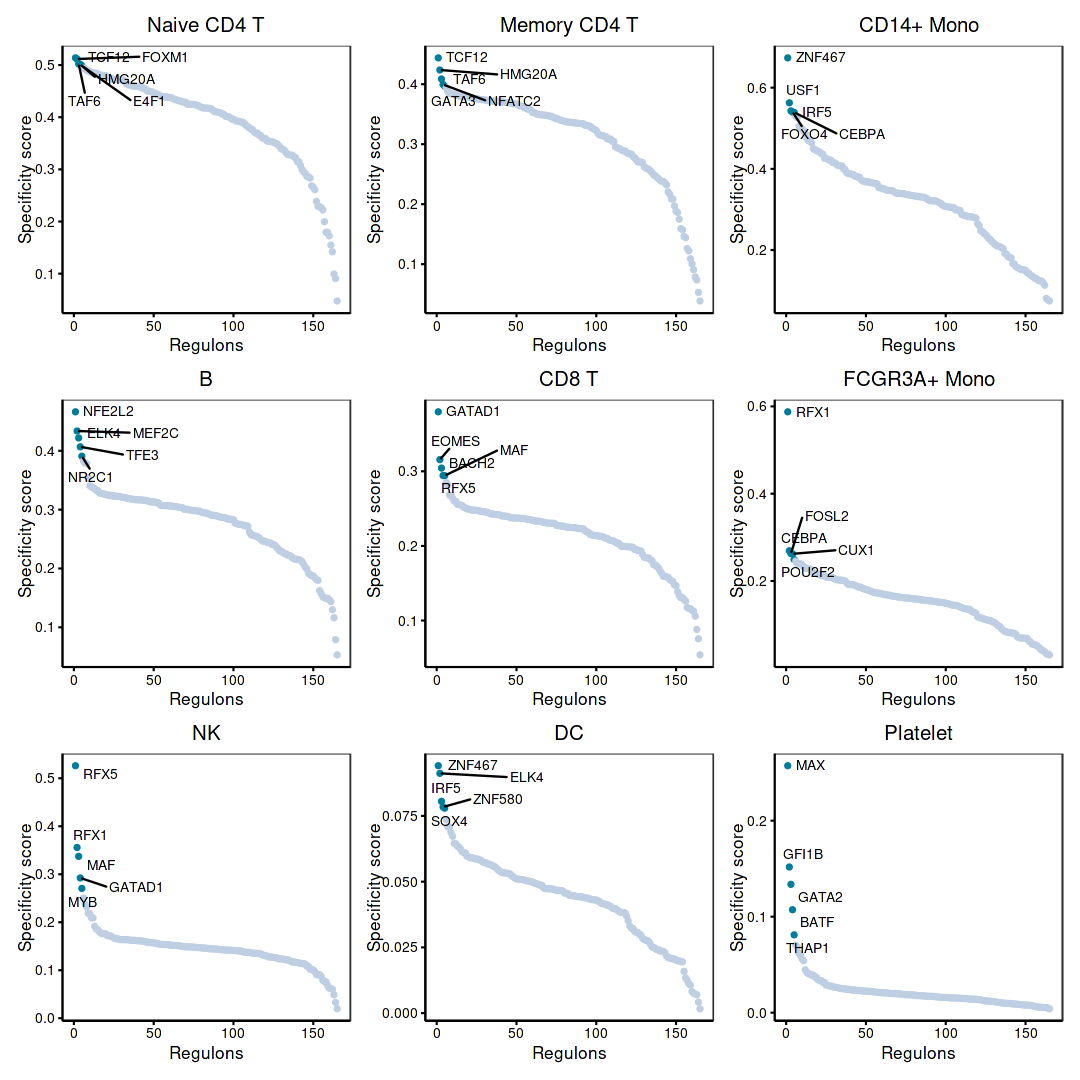

In [ ]:
p.rank = lapply(colnames(rssMat), function(ct){
  PlotRegulonRank(rssMat, ct, topn = 5, front.size = 10, point.size = 1)
})
names(p.rank) = colnames(rssMat)

options(repr.plot.width = 9, repr.plot.height = 9)
wrap_plots(p.rank)

In [ ]:
ggsave(filename = "./Outplot/Step2.pySCENIC_TFs_rank_plot.pdf", height = 15, width = 15, units = "cm")

### Step6. 绘制二值热图（需要LINUX下运行）

In [ ]:
### Limux下运行
#conda activate pyscenic

cat >Step2.postSCENIC_for_py.sh
HOME_PATH=/data_disk/ST01/DJT/User/zhaoxm/python_data/pyscenic/Python.data/
f_loom_path_scenic=$HOME_PATH/out_SCENIC.loom
ctx_output=$HOME_PATH/reg.csv
sample_name=$HOME_PATH/PBMC
threads=10
min_regulon_size=10
python python_postSCENIC.py $f_loom_path_scenic $ctx_output $sample_name $threads $min_regulon_size

## Run
nohup bash Step2.postSCENIC_for_py.sh 1> Step2.postSCENIC_for_py.log 2>&1 &

In [ ]:
input.data = read.csv("./Python.data/PBMC.binary_mtx.csv",sep = "\t", row.names = 1,check.names = F)
input.data[1:4,1:4]

ARID3A(+) ATF1(+) ATF2(+) ATF3(+)
AAACATACAACCAC 0         0       0       0      
AAACATTGAGCTAC 0         0       0       0      
AAACATTGATCAGC 0         0       0       0      
AAACCGTGCTTCCG 1         0       0       0

In [ ]:
input.data = as.matrix(t(input.data))
input.data[1:4,1:4]

AAACATACAACCAC AAACATTGAGCTAC AAACATTGATCAGC AAACCGTGCTTCCG
ARID3A(+) 0              0              0              1             
ATF1(+)   0              0              0              0             
ATF2(+)   0              0              0              0             
ATF3(+)   0              0              0              0

In [ ]:
table(colnames(seurat.data) == colnames(input.data))


TRUE 
2700 

In [ ]:
column_top = HeatmapAnnotation(
  celltype = seurat.data$seurat_annotations,
  border = F)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



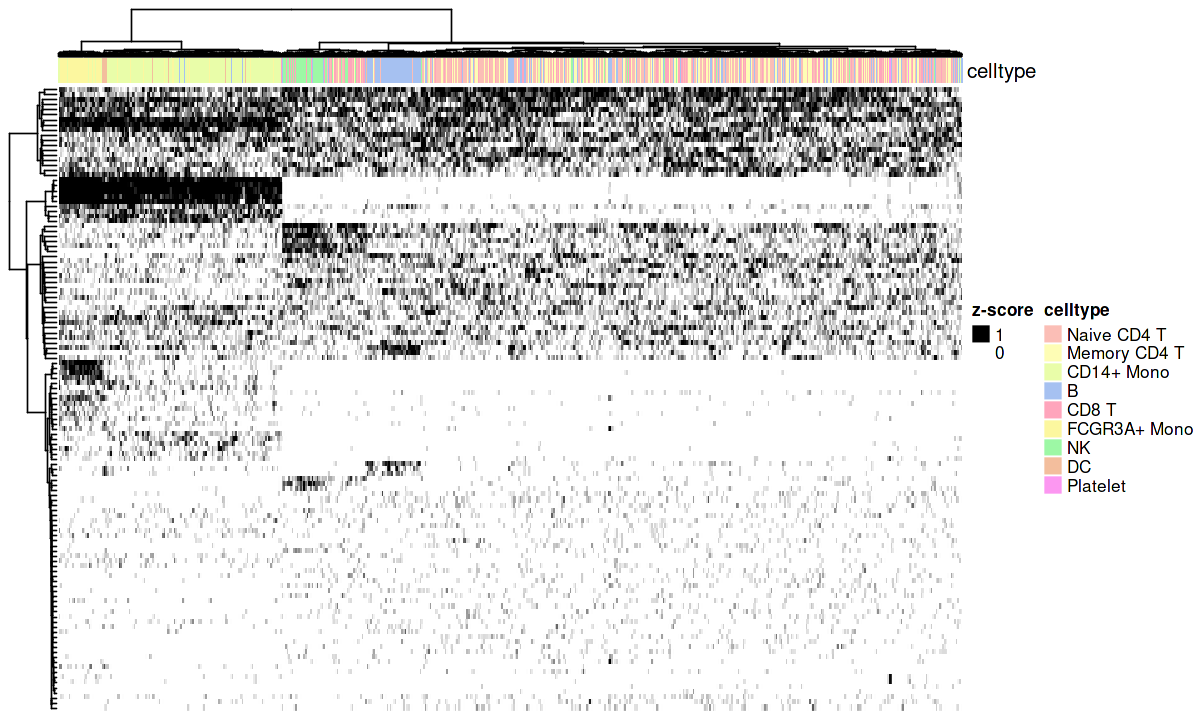

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)
Heatmap(
  input.data,
  name                         = "z-score",
  top_annotation               = column_top,
  col                          = c("white", "black"),
  show_row_names               = FALSE,
  show_column_names            = FALSE,
  row_names_gp                 = gpar(fontsize = 6),
  clustering_method_rows = "ward.D2",
  clustering_method_columns = "ward.D2",
  row_title_rot                = 0,
  cluster_rows                 = TRUE,
  cluster_row_slices           = FALSE,
  cluster_columns              = TRUE)

In [ ]:
seurat.data@meta.data[,"Regulon: EOMES"] = as.factor(input.data["EOMES(+)",])

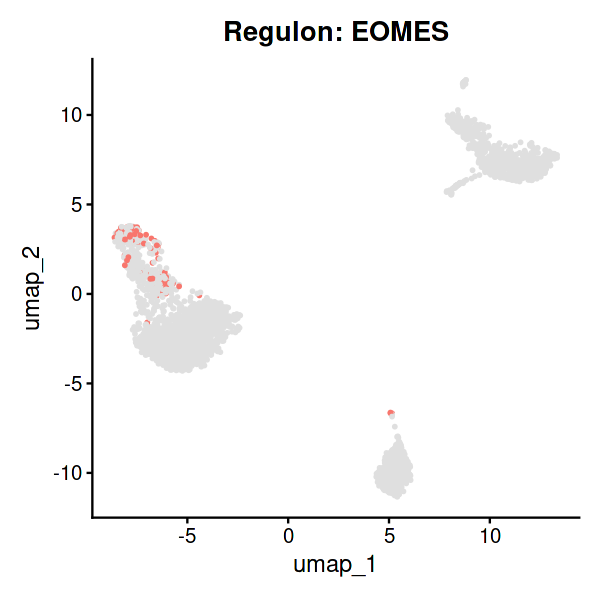

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
DimPlot(seurat.data, group.by = "Regulon: EOMES")+
    scale_color_manual(values = c("#dfdfdf", "#f8766d"))+
    NoLegend()

In [ ]:
### 也可以用Python运行

In [ ]:
library(reticulate)
library(sceasy)
adata <- convertFormat(seurat.data,
                       outFile = "./Python.data/Step2.seurat.data_for_python.h5ad",
                       from="seurat",
                       to="anndata",
                       main_layer="counts",
                       drop_single_values=FALSE)

Warning message:
"`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours."


In [ ]:
### End